In [1]:
import ga_tsp as ga
import utility as util
import numpy as np

3.1 Simply find the best route and cost without any restrictions

In [5]:
best_route_list = []
for i in range(10):
    result = ga.run_evolution(city_list=util.read_file("Dataset/Initial_dataset.txt"),
                              population_size=50,
                              crossover_rate=0.7,
                              mutation_rate=0.01,
                              elitism_size=0.1,
                              generation_limit=100,
                              cost_limit=0)
    
    print(f"run: {i + 1}", end="\t")
    util.print_route_cost(result[0][0], one_way=False)
    best_route_list.append(result[0][0])

util.find_global_min(best_route_list, one_way=False)

run: 1	best route: 6 2 9 1 4 8 3 7 10 5 	cost: 2.583248284332358
run: 2	best route: 7 3 8 4 1 9 2 6 5 10 	cost: 2.583248284332358
run: 3	best route: 10 7 3 8 4 1 9 2 6 5 	cost: 2.583248284332358
run: 4	best route: 10 7 3 8 4 1 9 2 6 5 	cost: 2.583248284332358
run: 5	best route: 7 3 8 4 1 9 2 6 5 10 	cost: 2.583248284332358
run: 6	best route: 5 6 2 9 1 4 8 3 7 10 	cost: 2.583248284332358
run: 7	best route: 7 3 8 4 1 9 2 6 5 10 	cost: 2.583248284332358
run: 8	best route: 10 7 3 8 4 1 9 2 6 5 	cost: 2.583248284332358
run: 9	best route: 7 3 8 4 1 9 2 6 5 10 	cost: 2.583248284332358
run: 10	best route: 7 3 8 4 1 9 2 6 5 10 	cost: 2.583248284332358
global min best route: 6 2 9 1 4 8 3 7 10 5 	cost: 2.583248284332358


3.2 Try population size from 10 to 100

population size: 10	average generation number: 67.12	average convergence time: 0.1340702533721924
population size: 20	average generation number: 44.9	average convergence time: 0.3064352703094482
population size: 30	average generation number: 32.74	average convergence time: 0.4771243524551392
population size: 40	average generation number: 24.4	average convergence time: 0.6151611471176147
population size: 50	average generation number: 24.92	average convergence time: 0.9700149202346802
population size: 60	average generation number: 13.14	average convergence time: 0.7310235834121704
population size: 70	average generation number: 13.7	average convergence time: 1.0195678997039794
population size: 80	average generation number: 15.88	average convergence time: 1.5382145404815675
population size: 90	average generation number: 14.22	average convergence time: 1.736111741065979
population size: 100	average generation number: 11.04	average convergence time: 1.6606087017059326


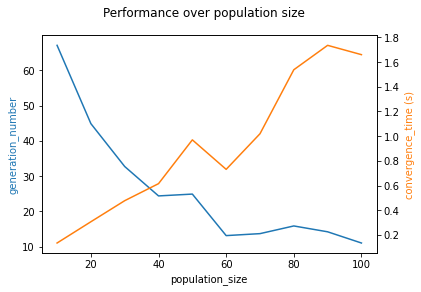

In [17]:
population_size_list = range(10, 101, 10)
generation_number_list = []
convergence_time_list = []

for j in population_size_list:
    generation_number_each_run = []
    convergence_time_each_run = []

    for i in range(50):
        result = ga.run_evolution(city_list=util.read_file("Dataset/Initial_dataset.txt"),
                                  population_size=j,
                                  crossover_rate=0.7,
                                  mutation_rate=0.01,
                                  elitism_size=0.1,
                                  generation_limit=100,
                                  cost_limit=2.6)
        
        generation_number_each_run.append(result[1])
        convergence_time_each_run.append(result[2])

    generation_number_list.append(util.average(generation_number_each_run))
    convergence_time_list.append(util.average(convergence_time_each_run))
    print(f"population size: {j}\t"
          f"average generation number: {util.average(generation_number_each_run)}\t"
          f"average convergence time: {util.average(convergence_time_each_run)}")


util.plot_performance_double(x=population_size_list,
                             y1=generation_number_list,
                             y2=convergence_time_list,
                             x_label="population_size",
                             y1_label="generation_number",
                             y2_label="convergence_time (s)",
                             title="Performance over population size",
                             log_flag=False)

3.3 Try crossover rate from 0.1 to 1.0

crossover rate: 0.1	average generation number: 74.84	average convergence time: 2.8676948881149293
crossover rate: 0.2	average generation number: 69.86	average convergence time: 2.6917551374435424
crossover rate: 0.30000000000000004	average generation number: 52.52	average convergence time: 2.0271018075942995
crossover rate: 0.4	average generation number: 48.2	average convergence time: 1.8603895854949952
crossover rate: 0.5	average generation number: 29.92	average convergence time: 1.1509722566604614
crossover rate: 0.6	average generation number: 28.76	average convergence time: 1.1135073184967041
crossover rate: 0.7000000000000001	average generation number: 20.96	average convergence time: 0.8125857210159302
crossover rate: 0.8	average generation number: 14.74	average convergence time: 0.570972876548767
crossover rate: 0.9	average generation number: 13.72	average convergence time: 0.5348853397369385
crossover rate: 1.0	average generation number: 15.1	average convergence time: 0.590013875

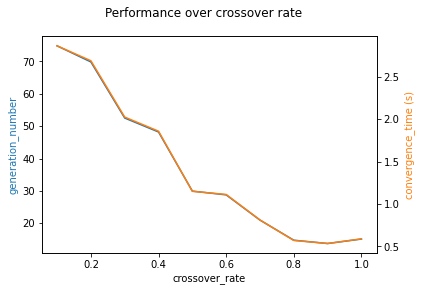

In [3]:
crossover_rate_list = np.arange(0.1, 1.1, 0.1)
generation_number_list = []
convergence_time_list = []

for j in crossover_rate_list:
    generation_number_each_run = []
    convergence_time_each_run = []

    for i in range(50):
        result = ga.run_evolution(city_list=util.read_file("Dataset/Initial_dataset.txt"),
                                  population_size=50,
                                  crossover_rate=j,
                                  mutation_rate=0.01,
                                  elitism_size=0.1,
                                  generation_limit=100,
                                  cost_limit=2.6)
        
        generation_number_each_run.append(result[1])
        convergence_time_each_run.append(result[2])
    print(f"crossover rate: {j}\t"
          f"average generation number: {util.average(generation_number_each_run)}\t"
          f"average convergence time: {util.average(convergence_time_each_run)}")

    generation_number_list.append(util.average(generation_number_each_run))
    convergence_time_list.append(util.average(convergence_time_each_run))

util.plot_performance_double(x=crossover_rate_list,
                             y1=generation_number_list,
                             y2=convergence_time_list,
                             x_label="crossover_rate",
                             y1_label="generation_number",
                             y2_label="convergence_time (s)",
                             title="Performance over crossover rate",
                             log_flag=False)

3.4 Try mutation rate from 0.000001 to 1

mutation rate: 1e-06	average generation number: 22.6	average convergence time: 0.9037343978881835
mutation rate: 1e-05	average generation number: 27.26	average convergence time: 1.102612142562866
mutation rate: 0.0001	average generation number: 21.7	average convergence time: 0.8765473556518555
mutation rate: 0.001	average generation number: 22.36	average convergence time: 0.9007948684692383
mutation rate: 0.01	average generation number: 17.86	average convergence time: 0.7122200965881348
mutation rate: 0.1	average generation number: 19.76	average convergence time: 0.7957763957977295
mutation rate: 1.0	average generation number: 21.24	average convergence time: 0.9097464990615844


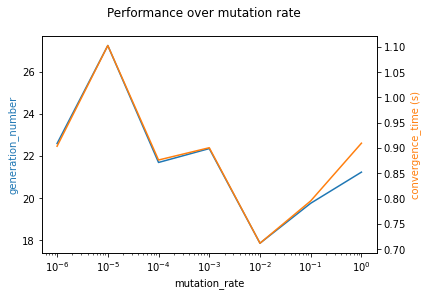

In [4]:
mutation_rate_list = list(1 / (10 ** exp) for exp in range(6, -1, -1))
generation_number_list = []
convergence_time_list = []
for j in mutation_rate_list:
    generation_number_each_run = []
    convergence_time_each_run = []

    for i in range(50):
        result = ga.run_evolution(city_list=util.read_file("Dataset/Initial_dataset.txt"),
                                  population_size=50,
                                  crossover_rate=0.7,
                                  mutation_rate=0.01,
                                  elitism_size=j,
                                  generation_limit=100,
                                  cost_limit=2.6)
        generation_number_each_run.append(result[1])
        convergence_time_each_run.append(result[2])
    print(f"mutation rate: {j}\t"
          f"average generation number: {util.average(generation_number_each_run)}\t"
          f"average convergence time: {util.average(convergence_time_each_run)}")


    generation_number_list.append(util.average(generation_number_each_run))
    convergence_time_list.append(util.average(convergence_time_each_run))

util.plot_performance_double(x=mutation_rate_list,
                             y1=generation_number_list,
                             y2=convergence_time_list,
                             x_label="mutation_rate",
                             y1_label="generation_number",
                             y2_label="convergence_time (s)",
                             title="Performance over mutation rate",
                             log_flag=True)

3.5 Try elitism rate from 0.1 to 1.0

elitism rate: 0.1	average generation number: 17.6	average convergence time: 0.6976287937164307
elitism rate: 0.2	average generation number: 17.28	average convergence time: 0.6789724111557007
elitism rate: 0.30000000000000004	average generation number: 15.46	average convergence time: 0.6174794387817383
elitism rate: 0.4	average generation number: 14.98	average convergence time: 0.5938861083984375
elitism rate: 0.5	average generation number: 15.02	average convergence time: 0.5917708349227905
elitism rate: 0.6	average generation number: 16.88	average convergence time: 0.6626544284820557
elitism rate: 0.7000000000000001	average generation number: 16.1	average convergence time: 0.6400449132919311
elitism rate: 0.8	average generation number: 22.22	average convergence time: 0.8821390724182129
elitism rate: 0.9	average generation number: 22.74	average convergence time: 0.8958063888549804
elitism rate: 1.0	average generation number: 20.92	average convergence time: 0.838550124168396


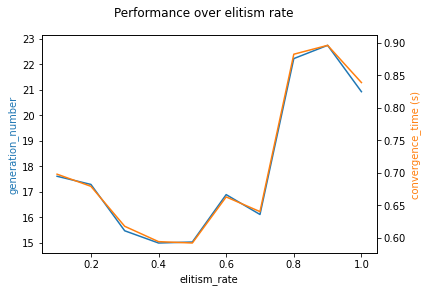

In [6]:
elitism_rate_list = np.arange(0.1, 1.1, 0.1)
generation_number_list = []
convergence_time_list = []

for j in elitism_rate_list:
    generation_number_each_run = []
    convergence_time_each_run = []

    for i in range(50):
        result = ga.run_evolution(city_list=util.read_file("Dataset/Initial_dataset.txt"),
                                  population_size=50,
                                  crossover_rate=0.7,
                                  mutation_rate=j,
                                  elitism_size=0.1,
                                  generation_limit=100,
                                  cost_limit=2.6)
        generation_number_each_run.append(result[1])
        convergence_time_each_run.append(result[2])
    print(f"elitism rate: {j}\t"
          f"average generation number: {util.average(generation_number_each_run)}\t"
          f"average convergence time: {util.average(convergence_time_each_run)}")

    generation_number_list.append(util.average(generation_number_each_run))
    convergence_time_list.append(util.average(convergence_time_each_run))

util.plot_performance_double(x=elitism_rate_list,
                             y1=generation_number_list,
                             y2=convergence_time_list,
                             x_label="elitism_rate",
                             y1_label="generation_number",
                             y2_label="convergence_time (s)",
                             title="Performance over elitism rate",
                             log_flag=False)

4.1 More cities

number of cities: 20
run: 1	best route: 5 7 10 16 18 17 19 3 9 1 8 15 4 6 12 2 20 14 13 11 	cost: 3.6888175962589327
run: 2	best route: 14 2 6 12 11 5 7 10 16 18 17 19 3 9 1 15 4 8 20 13 	cost: 3.8242439629992733
run: 3	best route: 16 10 7 9 15 4 8 1 6 13 14 20 2 12 11 5 19 3 17 18 	cost: 4.33728785845047
run: 4	best route: 14 20 15 4 8 1 9 10 7 18 16 17 19 3 5 11 12 6 2 13 	cost: 4.444613130141214
run: 5	best route: 16 10 7 9 1 8 15 4 6 2 13 14 20 12 11 5 3 19 17 18 	cost: 4.263164941465463
run: 6	best route: 4 8 1 9 3 19 18 17 16 10 7 5 11 13 14 20 2 12 6 15 	cost: 4.032223984751787
run: 7	best route: 7 5 6 2 20 13 14 11 12 9 1 8 4 15 3 19 17 18 16 10 	cost: 3.9283612411160975
run: 8	best route: 14 20 2 6 5 10 7 18 16 17 19 3 8 4 15 9 1 12 11 13 	cost: 4.095461939637351
run: 9	best route: 10 7 9 15 4 8 1 6 11 13 14 20 2 12 5 3 19 17 18 16 	cost: 4.3731475377529065
run: 10	best route: 14 20 11 7 10 16 18 17 19 3 4 15 8 9 1 5 12 6 2 13 	cost: 4.179887457152089
global min best route: 5 

run: 1	best route: 68 20 78 91 65 41 14 43 12 17 74 73 2 93 83 25 36 99 62 96 97 37 18 45 67 40 58 53 27 33 77 52 4 23 59 24 51 26 72 11 38 46 28 1 80 49 9 71 85 56 6 95 76 57 29 86 64 22 54 75 44 7 92 55 19 89 39 48 84 79 31 98 47 30 32 60 88 16 50 82 90 10 42 94 69 21 15 61 13 5 100 81 87 63 8 34 70 66 3 35 	cost: 23.365877163781967
run: 2	best route: 61 29 62 81 83 18 77 63 37 47 23 49 3 78 45 87 85 27 28 42 89 76 74 72 46 98 48 79 73 69 6 57 31 2 56 1 4 97 34 52 66 44 64 54 22 5 94 43 16 38 30 7 13 25 36 95 80 100 93 33 8 70 35 68 65 15 21 60 11 82 88 90 26 99 24 51 55 17 50 19 32 12 39 96 67 40 9 92 91 41 86 53 20 10 14 75 59 58 71 84 	cost: 24.393066528812323
run: 3	best route: 61 85 27 4 87 40 86 84 41 75 9 33 70 77 36 79 43 68 65 37 45 3 53 96 42 92 24 55 58 78 54 64 23 59 14 10 99 74 6 25 93 48 98 19 69 12 21 38 67 20 22 44 66 35 52 63 34 97 8 18 29 95 1 80 81 91 60 50 11 26 88 51 82 16 90 15 28 83 71 76 72 94 30 32 89 7 47 5 39 73 56 31 46 2 57 62 49 100 17 13 	cost: 25.29619

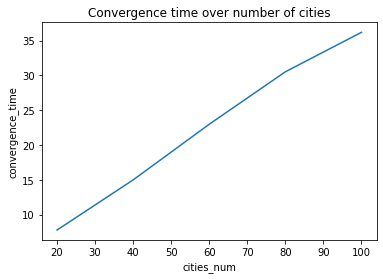

In [6]:
convergence_time_list = []

for j in range(20, 101, 20):
    city_list = util.read_file("Dataset/Initial_dataset.txt")
    util.add_more_cities(city_list, j - 10)
    print(f"number of cities: {len(city_list)}")

    best_route_list = []

    for i in range(10):
        convergence_time_each_run = []
        result = ga.run_evolution(city_list=city_list,
                                  population_size=50,
                                  crossover_rate=0.7,
                                  mutation_rate=0.01,
                                  elitism_size=0.1,
                                  generation_limit=100,
                                  cost_limit=0)
        print(f"run: {i + 1}", end="\t")
        util.print_route_cost(result[0][0], one_way=False)
        best_route_list.append(result[0][0])
        convergence_time_each_run.append(result[2])

    convergence_time_list.append(util.average(convergence_time_each_run))
    util.find_global_min(best_route_list, one_way=False)

util.plot_performance(x=range(20, 101, 20),
                      y=convergence_time_list,
                      x_label="cities_num",
                      y_label="convergence_time",
                      title="Convergence time over number of cities")

4.2 Given start and end cities

In [3]:
import ga_given_start_end as ga_gse

In [4]:
best_route_list = []
for i in range(10):
    result = ga_gse.run_evolution(city_list=util.read_file("Dataset/Initial_dataset.txt"),
                                  population_size=50,
                                  crossover_rate=0.7,
                                  mutation_rate=0.01,
                                  elitism_size=0.1,
                                  generation_limit=100,
                                  cost_limit=0,
                                  start_city=9,
                                  end_city=5)
    print(f"run: {i + 1}", end="\t")
    util.print_route_cost(result[0][0], one_way=True)
    best_route_list.append(result[0][0])

util.find_global_min(best_route_list, one_way=True)

run: 1	best route: 9 1 6 2 4 8 3 7 10 5 	cost: 2.4315533675724423
run: 2	best route: 9 1 4 8 3 10 7 6 2 5 	cost: 2.574040010475139
run: 3	best route: 9 1 6 2 4 8 3 7 10 5 	cost: 2.4315533675724423
run: 4	best route: 9 1 6 2 4 8 3 7 10 5 	cost: 2.4315533675724423
run: 5	best route: 9 1 6 2 4 8 3 7 10 5 	cost: 2.4315533675724423
run: 6	best route: 9 1 6 2 4 8 3 7 10 5 	cost: 2.4315533675724423
run: 7	best route: 9 8 4 2 6 1 3 7 10 5 	cost: 2.597308204522193
run: 8	best route: 9 1 6 2 4 8 3 7 10 5 	cost: 2.4315533675724423
run: 9	best route: 9 3 8 4 1 2 6 7 10 5 	cost: 2.5322468275748045
run: 10	best route: 9 1 6 2 4 8 3 7 10 5 	cost: 2.4315533675724423
global min best route: 9 1 6 2 4 8 3 7 10 5 	cost: 2.4315533675724423


4.3 Asymmetric traveling salesman problem (ATSP)

In [1]:
import ga_atsp

In [4]:
best_route_list = []
distance_dict = util.read_file_distance_atsp("Dataset/Atsp_distance_dataset.txt")

for i in range(10):
    result = ga_atsp.run_evolution(city_list=util.read_file("Dataset/Initial_dataset.txt"),
                                   distance_dict=distance_dict,
                                   population_size=50,
                                   crossover_rate=0.7,
                                   mutation_rate=0.01,
                                   elitism_size=0.1,
                                   generation_limit=100,
                                   cost_limit=0)
    print(f"run: {i + 1}", end="\t")
    util.print_route_cost_atsp(result[0][0], distance_dict)
    best_route_list.append(result[0][0])

util.find_global_min_atsp(best_route_list, distance_dict)

run: 1	best route: 5 3 4 2 7 10 1 9 6 8 	cost: 1.798430309
run: 2	best route: 7 4 2 3 10 1 9 6 8 5 	cost: 1.7157684599999998
run: 3	best route: 7 4 2 3 10 1 9 6 8 5 	cost: 1.7157684599999998
run: 4	best route: 7 4 2 3 10 1 9 6 8 5 	cost: 1.7157684599999998
run: 5	best route: 6 8 5 3 4 2 7 10 1 9 	cost: 1.798430309
run: 6	best route: 7 4 2 3 10 1 9 6 8 5 	cost: 1.7157684599999998
run: 7	best route: 7 4 2 3 10 1 9 6 8 5 	cost: 1.7157684599999998
run: 8	best route: 7 4 2 3 10 1 9 6 8 5 	cost: 1.7157684599999998
run: 9	best route: 7 4 2 3 10 1 9 6 8 5 	cost: 1.7157684599999998
run: 10	best route: 7 4 2 3 10 1 9 6 8 5 	cost: 1.7157684599999998
global min best route: 7 4 2 3 10 1 9 6 8 5 	cost: 1.7157684599999998


4.4 Sequential ordering problem (SOP)

In [2]:
import ga_sop

In [3]:
best_route_list = []

for i in range(10):
    result = ga_sop.run_evolution(city_list=util.read_file("Dataset/Initial_dataset.txt"),
                                  population_size=50,
                                  crossover_rate=0.7,
                                  mutation_rate=0.01,
                                  elitism_size=0.1,
                                  generation_limit=100,
                                  cost_limit=0,
                                  sequence=[9, 5, 3])
    print(f"run: {i + 1}", end="\t")
    util.print_route_cost(result[0][0], one_way=False)
    best_route_list.append(result[0][0])

util.find_global_min(best_route_list, one_way=False)

run: 1	best route: 9 2 6 5 7 10 3 8 1 4 	cost: 2.7849313178331725
run: 2	best route: 9 5 10 7 2 6 1 4 8 3 	cost: 2.898864805435662
run: 3	best route: 9 7 10 5 6 2 4 8 3 1 	cost: 2.759091511308884
run: 4	best route: 9 1 7 10 5 6 2 4 8 3 	cost: 2.7815180187224184
run: 5	best route: 8 4 1 9 7 10 5 6 2 3 	cost: 2.8528664125793726
run: 6	best route: 8 4 1 9 2 6 5 10 7 3 	cost: 2.5832482843323583
run: 7	best route: 8 4 1 9 2 6 5 10 7 3 	cost: 2.5832482843323583
run: 8	best route: 1 9 2 6 5 10 7 3 8 4 	cost: 2.5832482843323583
run: 9	best route: 9 7 10 5 6 2 1 8 4 3 	cost: 2.852718225555896
run: 10	best route: 9 1 4 8 2 6 5 10 7 3 	cost: 2.696033919339156
global min best route: 8 4 1 9 2 6 5 10 7 3 	cost: 2.5832482843323583


4.5 GATSP with clustering

In [2]:
import ga_clustering as ga_cl

In [3]:
city_list = util.read_file_only_coordinates("Dataset/Cluster_dataset.txt")
clustering_result_list = util.read_clustering_result("Dataset/clustering_result.csv")
cluster_list = ga_cl.map_clustering(city_list, clustering_result_list)

ga_cl.run_evolution_clustering(cluster_list=cluster_list,
                               population_size=50,
                               crossover_rate=0.7,
                               mutation_rate=0.01,
                               elitism_size=0.1,
                               generation_limit=100,
                               cost_limit=0)

run: 1	best route: 26 37 29 36 27 31 28 33 32 35 34 30 17 22 25 20 19 8 12 13 38 40 	cost: 25.24985847616219
run: 2	best route: 26 37 29 36 31 27 28 35 33 32 34 17 30 19 20 25 22 8 13 12 38 40 	cost: 25.24985847616219
run: 3	best route: 40 37 26 29 36 31 27 28 22 20 17 19 30 25 32 33 35 34 13 12 8 38 	cost: 23.35917360311745
run: 4	best route: 40 26 37 29 36 27 28 31 32 34 35 33 19 22 25 30 20 17 13 8 12 38 	cost: 22.187600727863643
run: 5	best route: 34 33 32 35 20 22 19 25 17 30 27 31 28 13 12 8 38 40 36 37 26 29 	cost: 28.184675243171014
run: 6	best route: 38 12 13 25 8 31 28 27 22 20 17 30 19 35 33 34 32 36 40 26 37 29 	cost: 29.53663105724556
run: 7	best route: 36 29 26 37 40 38 13 8 12 25 17 19 20 30 22 34 33 32 35 28 27 31 	cost: 26.712539288171435
run: 8	best route: 26 37 29 36 35 33 27 31 28 34 32 19 22 20 25 30 17 12 13 8 38 40 	cost: 27.540966412917626
run: 9	best route: 38 8 12 13 30 25 22 19 35 33 34 32 17 20 27 28 31 36 29 37 26 40 	cost: 22.773387165490547
run: 10	best r